In [201]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

distances = [('a', 'b', 45), ('a', 'c', 37), ('a', 'd', 14), ('a', 'e', 23), ('b', 'c', 63), ('b', 'd', 31), ('b', 'e', 22), ('c', 'd', 9), ('c', 'e', 35), ('d', 'e', 68)]

class Individ():
    def __init__(self, distances, chrom=None):
        self.distances = distances
        self.genome = chrom if chrom != None else [random.randint(0, 1) for i in range(0, 10)]
        self.weight = self.weight_individ()
        self.chance = 1/self.weight

    def weight_individ(self):
        G = nx.Graph()
        l = []
        for index, gen in enumerate(self.genome):
            if gen == 1:
                l.append(self.distances[index])
        G.add_weighted_edges_from(l)
        routes = self._get_routes()
        weight = 0
        for route in routes:
            try:
                weight += nx.dijkstra_path_length(G, route[0], route[1])
            except nx.NodeNotFound:
                weight += 300
                break
            except nx.NetworkXNoPath:
                weight += 300
                break
        return weight
            
    def _get_routes(self):
        routes = []
        for route in self.distances:
            routes.append((route[0], route[1]))
        return routes

class Population():
    def __init__(self, size, distances):
        self.size = size if size % 2 == 0 else size + 1
        self.distances = distances
        self.population = self._create_population()
        self.kids = []

    def _create_population(self):
        population = []
        for i in range(0, self.size):
            population.append(Individ(self.distances))
        return population
    
    def selection(self):
        sum = 0
        chances = []
        for individ in self.kids:
            sum += individ.chance
        for index, individ in enumerate(self.kids):
            chances.append((index, individ.chance/sum))
        population_copy = self.kids.copy()
        for index, chrom in enumerate(population_copy):
            roulette = random.uniform(0, 1)
            this_chance = chances[index][1]
            try:
                next_chance = chances[index + 1][1]
            except IndexError:
                next_chance = 1
            if not (roulette >= this_chance and roulette < next_chance):
                population_copy.pop(index)
        self.kids = population_copy

    def crossover(self):
        moms = self.population[:int(self.size/2)]
        dads = self.population[int(self.size/2):]
        for i in range(0, int(self.size/2)):
            mom = moms[random.randint(0, len(moms) - 1)]
            dad = dads[random.randint(0, len(dads) - 1)]
            separator = int(len(mom.genome)/2)
            child1 = mom.genome[:separator] + dad.genome[separator:]
            child2 = mom.genome[separator:] + dad.genome[:separator]
            self.kids.append(Individ(self.distances, child1))
            self.kids.append(Individ(self.distances, child2))

    def create_new_population(self):
        parents = self.population.copy()
        kids = self.kids.copy()
        parents = sorted(parents, key=lambda x: x.weight)
        kids = sorted(kids, key=lambda x: x.weight)
        new_population = kids
        if len(new_population) < self.size:
            to_add = self.size - len(new_population)
            for i in range(0, to_add):
                new_population.append(parents[i])
        self.population = new_population
        self.kids = []

    def mutate(self):
        mutated_population = []
        for individ in self.population:
            chance = random.randint(0, 10)
            index_of_flip_gen = []
            for gen in individ.genome:
                chance_to_flip = random.uniform(0, 1)
                index_of_flip_gen.append(1 if chance_to_flip < .1 else 0)
            if chance < 3:
                new_chrom = []
                for index, gen in enumerate(individ.genome):
                    if index_of_flip_gen[index] == 1:
                        new_chrom.append(0 if gen == 1 else 1)
                    else:
                        new_chrom.append(gen)
                individ.genome = new_chrom
                individ.weight = individ.weight_individ()
                mutated_population.append(individ)
            else: 
                mutated_population.append(individ)
        self.population = mutated_population

    def population_result(self):
        sorted(self.population, key=lambda x: x.weight)
        print((self.population[0].genome, self.population[0].weight))
        print((self.population[1].genome, self.population[1].weight))
        print((self.population[2].genome, self.population[2].weight))

population = Population(10, distances)
iterration = [1]
best_result = [0]
for i in range(0, 100):
    population.crossover()
    population.selection()
    population.create_new_population()
    population.mutate()
    iterration.append(iterration[-1] + 1)
    best_result.append(population.population[0].weight)
population.population_result()


([0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 300)
([0, 0, 1, 1, 1, 0, 1, 1, 1, 0], 324)
([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 300)


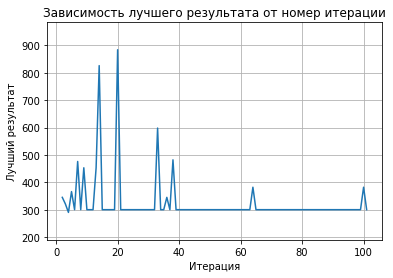

In [202]:


plt.title("Зависимость лучшего результата от номер итерации")
plt.xlabel("Итерация")         
plt.ylabel("Лучший результат") 
plt.grid()
plt.ylim([min(best_result[1:]) - 100, max(best_result) + 100])             
plt.plot(iterration[1:], best_result[1:])  